<h1>Interpolate FC cost term data</h1>

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_COST_FC.csv', converters={'PARTY_ID': str, 'COM_ID': str, 'CNTR_SIZE': str})
df['POD'] = pd.to_datetime(df['POD'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].fillna(-1).astype(int)
df = df.dropna(subset=['ENCODED_TYPE'])
df['RATE'] = df['RATE'].fillna(-1).astype(int)
df = df.dropna(subset=['RATE'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].astype(int)


df.head()
df.info()
print(f'Dataset size: {df.shape}')


,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,POD_ID_EN
0,010,010003678,10003678,OY TAVATUR SHIPPING LTD,ECS010060100191,20060228,FIHEL,HELSINKI,2006-02-28,CTNR010060201232,20,GP,FC,675,2,1,4.103561e+09
1,010,010004286,10004286,"GLOBELINK KOREA CO., LTD",ECS010060100465,20060303,KRPUS,BUSAN,2006-03-03,CTNR010060300014,40,HC,FC,390,1,1,2.904902e+09
2,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS010060100321,20060227,NZAKL,AUCKLAND,2006-02-27,CTNR010060201198,40,HC NOR,FC,1615,4,1,2.397848e+09
3,010,01002775,1002775,GLOBELINK INTERNATIONAL PTY LTD-ADELAIDE,ECS010060200201,20060306,AUADL,ADELAIDE,2006-03-06,CTNR010060300119,40,HC,FC,700,1,1,2.480737e+08
4,010,01001088,1001088,CARGO LINES S.A.-LE HAVRE,ECS010060200146,20060307,FRMRS,MARSEILLE,2006-03-07,CTNR010060300185,20,GP,FC,675,2,1,4.197227e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54089 entries, 0 to 54088
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54089 non-null  object        
 1   PARTY_ID      54089 non-null  object        
 2   PARTY_ID_EN   54089 non-null  int64         
 3   PARTY_NAME    54089 non-null  object        
 4   CSL_ID        54089 non-null  object        
 5   ETA_ETD_NO    54089 non-null  int64         
 6   ETD_POL_D     54089 non-null  object        
 7   POD_ID        54083 non-null  object        
 8   POD           54089 non-null  datetime64[ns]
 9   CNTR_ID       54089 non-null  object        
 10  CNTR_SIZE     54089 non-null  object        
 11  CNTR_TYPE     54089 non-null  object        
 12  COST_TERM     54089 non-null  object        
 13  RATE          54089 non-null  int32         
 14  ENCODED_TYPE  54089 non-null  int32         
 15  ENCODED_TERM  54089 non-null  int64 

In [57]:
print(df.keys())

Index(['COM_ID', 'PARTY_ID', 'PARTY_ID_EN', 'PARTY_NAME', 'CSL_ID',
       'ETA_ETD_NO', 'ETD_POL_D', 'POD_ID', 'POD', 'CNTR_ID', 'CNTR_SIZE',
       'CNTR_TYPE', 'COST_TERM', 'RATE', 'ENCODED_TYPE', 'ENCODED_TERM',
       'POD_ID_EN'],
      dtype='object')


In [58]:
sel_col = ['COM_ID', 'PARTY_ID', 'PARTY_ID_EN', 'PARTY_NAME', 'CSL_ID',
       'ETA_ETD_NO', 'ETD_POL_D', 'POD_ID', 'POD', 'CNTR_ID', 'CNTR_SIZE',
       'CNTR_TYPE', 'RATE', 'ENCODED_TYPE','POD_ID_EN']

df_fc = df[sel_col]
df_fc.head()
df_fc.info()

,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,RATE,ENCODED_TYPE,POD_ID_EN
0,010,010003678,10003678,OY TAVATUR SHIPPING LTD,ECS010060100191,20060228,FIHEL,HELSINKI,2006-02-28,CTNR010060201232,20,GP,675,2,4.103561e+09
1,010,010004286,10004286,"GLOBELINK KOREA CO., LTD",ECS010060100465,20060303,KRPUS,BUSAN,2006-03-03,CTNR010060300014,40,HC,390,1,2.904902e+09
2,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS010060100321,20060227,NZAKL,AUCKLAND,2006-02-27,CTNR010060201198,40,HC NOR,1615,4,2.397848e+09
3,010,01002775,1002775,GLOBELINK INTERNATIONAL PTY LTD-ADELAIDE,ECS010060200201,20060306,AUADL,ADELAIDE,2006-03-06,CTNR010060300119,40,HC,700,1,2.480737e+08
4,010,01001088,1001088,CARGO LINES S.A.-LE HAVRE,ECS010060200146,20060307,FRMRS,MARSEILLE,2006-03-07,CTNR010060300185,20,GP,675,2,4.197227e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54089 entries, 0 to 54088
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54089 non-null  object        
 1   PARTY_ID      54089 non-null  object        
 2   PARTY_ID_EN   54089 non-null  int64         
 3   PARTY_NAME    54089 non-null  object        
 4   CSL_ID        54089 non-null  object        
 5   ETA_ETD_NO    54089 non-null  int64         
 6   ETD_POL_D     54089 non-null  object        
 7   POD_ID        54083 non-null  object        
 8   POD           54089 non-null  datetime64[ns]
 9   CNTR_ID       54089 non-null  object        
 10  CNTR_SIZE     54089 non-null  object        
 11  CNTR_TYPE     54089 non-null  object        
 12  RATE          54089 non-null  int32         
 13  ENCODED_TYPE  54089 non-null  int32         
 14  POD_ID_EN     54083 non-null  float64       
dtypes: datetime64[ns](1), float64(1), in

In [59]:
# interpolate missing values
df_fc['POD'].dt.year.unique()

array([2006, 2005, 2007, 2008, 2002, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2018, 2019, 2020, 2021, 2016, 2017, 2022, 2023], dtype=int64)

In [68]:
df_fc = df_fc.sort_values(by='POD').reset_index()
df_fc.head()
df_fc['POD'].dt.year.unique()

,index,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,RATE,ENCODED_TYPE,POD_ID_EN
0,4672,010,01002799,1002799,GLS INTERFREIGHT CO.LTD,ECS010071200653,20020117,THLKR,LATKRABANG,2002-01-17,CTNR010080100817,20,GP,180,2,2.524904e+09
1,4674,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS01050600041,20050715,NZAKL,AUCKLAND,2005-07-15,CTNR010050700351,40,HC NOR,2170,4,2.397848e+09
2,2375,010,01002767,1002767,GLOBELINK CONTAINER LINES (JB) S/B,ECS01050600163,20050715,MYPGU,PASIR GUDANG,2005-07-15,CTNR010050700370,40,HC,280,1,3.870912e+09
3,4675,010,01002303,1002303,GLOBELINK FALLOW LIMITED,ECS01050600610,20050715,GBFXT,FELIXSTOWE,2005-07-15,CTNR010050700353,40,GP,1800,2,9.417223e+08
4,1360,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600224,20050715,NLRTM,ROTTERDAM,2005-07-15,CTNR010050700354,40,HC NOR,1620,4,3.241651e+09


array([2002, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

<AxesSubplot: xlabel='POD'>

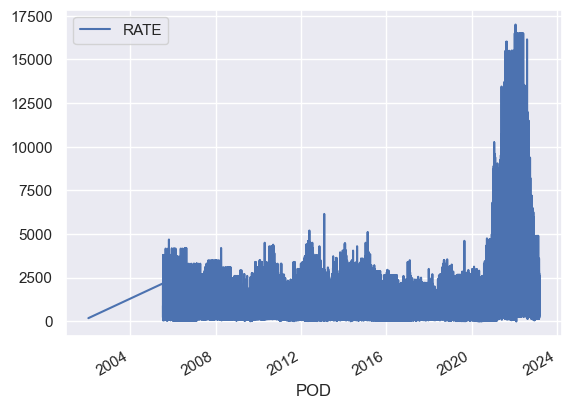

In [61]:
interpolated_data = df_fc.interpolate(method='ffill')
interpolated_data.plot(x='POD', y='RATE')
plt.show()

In [69]:
# Removing rows that contains year 2002
df2 = interpolated_data.loc[interpolated_data['POD'].dt.year != 2002].reset_index(drop=True)
df2.head()
df2.info()

,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,RATE,ENCODED_TYPE,POD_ID_EN
0,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS01050600041,20050715,NZAKL,AUCKLAND,2005-07-15,CTNR010050700351,40,HC NOR,2170,4,2.397848e+09
1,010,01002767,1002767,GLOBELINK CONTAINER LINES (JB) S/B,ECS01050600163,20050715,MYPGU,PASIR GUDANG,2005-07-15,CTNR010050700370,40,HC,280,1,3.870912e+09
2,010,01002303,1002303,GLOBELINK FALLOW LIMITED,ECS01050600610,20050715,GBFXT,FELIXSTOWE,2005-07-15,CTNR010050700353,40,GP,1800,2,9.417223e+08
3,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600224,20050715,NLRTM,ROTTERDAM,2005-07-15,CTNR010050700354,40,HC NOR,1620,4,3.241651e+09
4,010,01002783,1002783,GLOBELINK PAKISTAN (PVT) LTD,ECS01050600456,20050716,PKKHI,KARACHI (KICT),2005-07-16,CTNR010050700450,40,HC,1625,1,2.209312e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54088 entries, 0 to 54087
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54088 non-null  object        
 1   PARTY_ID      54088 non-null  object        
 2   PARTY_ID_EN   54088 non-null  int64         
 3   PARTY_NAME    54088 non-null  object        
 4   CSL_ID        54088 non-null  object        
 5   ETA_ETD_NO    54088 non-null  int64         
 6   ETD_POL_D     54088 non-null  object        
 7   POD_ID        54088 non-null  object        
 8   POD           54088 non-null  datetime64[ns]
 9   CNTR_ID       54088 non-null  object        
 10  CNTR_SIZE     54088 non-null  object        
 11  CNTR_TYPE     54088 non-null  object        
 12  RATE          54088 non-null  int32         
 13  ENCODED_TYPE  54088 non-null  int32         
 14  POD_ID_EN     54088 non-null  float64       
dtypes: datetime64[ns](1), float64(1), in

<AxesSubplot: xlabel='POD'>

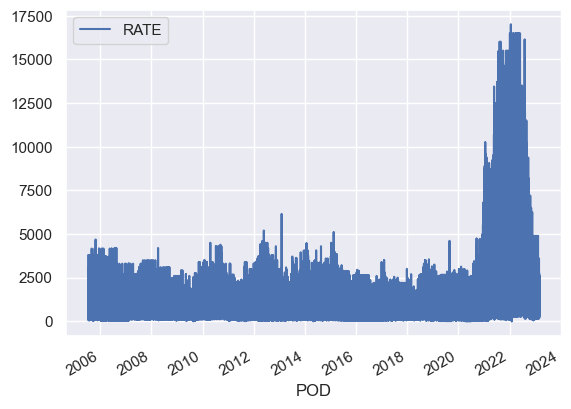

In [70]:
df2.plot(x='POD', y='RATE')
plt.show()

In [64]:
# Checking for negative cost rate
for values in df2['RATE']:
    if values <= 0:
        print(values)

0
0


In [72]:
df3 = df2.loc[df2['RATE'] > 0].reset_index(drop=True)
df3.head()
df3.info()

,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,RATE,ENCODED_TYPE,POD_ID_EN
0,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS01050600041,20050715,NZAKL,AUCKLAND,2005-07-15,CTNR010050700351,40,HC NOR,2170,4,2.397848e+09
1,010,01002767,1002767,GLOBELINK CONTAINER LINES (JB) S/B,ECS01050600163,20050715,MYPGU,PASIR GUDANG,2005-07-15,CTNR010050700370,40,HC,280,1,3.870912e+09
2,010,01002303,1002303,GLOBELINK FALLOW LIMITED,ECS01050600610,20050715,GBFXT,FELIXSTOWE,2005-07-15,CTNR010050700353,40,GP,1800,2,9.417223e+08
3,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600224,20050715,NLRTM,ROTTERDAM,2005-07-15,CTNR010050700354,40,HC NOR,1620,4,3.241651e+09
4,010,01002783,1002783,GLOBELINK PAKISTAN (PVT) LTD,ECS01050600456,20050716,PKKHI,KARACHI (KICT),2005-07-16,CTNR010050700450,40,HC,1625,1,2.209312e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54086 entries, 0 to 54085
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        54086 non-null  object        
 1   PARTY_ID      54086 non-null  object        
 2   PARTY_ID_EN   54086 non-null  int64         
 3   PARTY_NAME    54086 non-null  object        
 4   CSL_ID        54086 non-null  object        
 5   ETA_ETD_NO    54086 non-null  int64         
 6   ETD_POL_D     54086 non-null  object        
 7   POD_ID        54086 non-null  object        
 8   POD           54086 non-null  datetime64[ns]
 9   CNTR_ID       54086 non-null  object        
 10  CNTR_SIZE     54086 non-null  object        
 11  CNTR_TYPE     54086 non-null  object        
 12  RATE          54086 non-null  int32         
 13  ENCODED_TYPE  54086 non-null  int32         
 14  POD_ID_EN     54086 non-null  float64       
dtypes: datetime64[ns](1), float64(1), in

(array([9.10284242, 6.37574175, 8.84380171, ..., 8.28905692, 7.24848643,
       9.3698286 ]), 0.04298215913656507)


(array([[3.0000e+00, 1.0000e+01, 2.1000e+02, 9.1000e+02, 6.2580e+03,
         1.1117e+04, 1.9108e+04, 1.2198e+04, 2.6440e+03, 1.6280e+03],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]),
 array([ 0.        ,  1.20972481,  2.41944962,  3.62917444,  4.83889925,
         6.04862406,  7.25834887,  8.46807369,  9.6777985 , 10.88752331,
        12.09724812]),
 <a list of 2 BarContainer objects>)

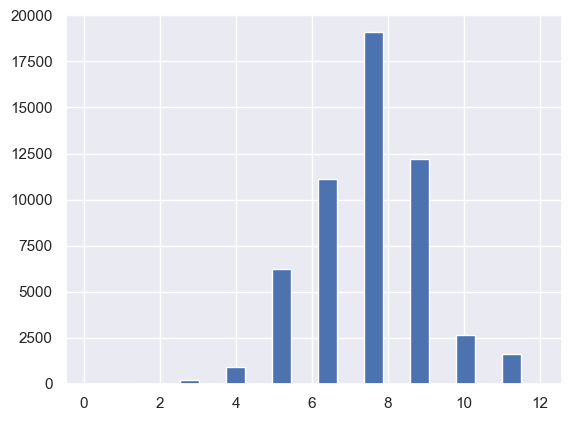

In [73]:
from scipy.stats import boxcox

# Doing symmetric distribution to determine to agg duplicated cost rate on the same date using mean or median
lambda_ = boxcox(df3['RATE'])
print(lambda_)
plt.hist(lambda_, bins=10)
plt.show()

<p>Negatively skewed data, it is usually recommended to use the median as the measure of central tendency instead of the mean. </p>

In [82]:
aggregation = {'RATE': 'median',
               'COM_ID': lambda x: x.iloc[0], 
               'PARTY_ID': lambda x: x.iloc[0], 
               'PARTY_ID_EN': lambda x: x.iloc[0], 
               'PARTY_NAME': lambda x: x.iloc[0], 
               'CSL_ID': lambda x: x.iloc[0],
              'ETA_ETD_NO': lambda x: x.iloc[0], 
              'ETD_POL_D': lambda x: x.iloc[0], 
              'POD_ID': lambda x: x.iloc[0], 
              'CNTR_ID': lambda x: x.iloc[0], 
              'CNTR_SIZE': lambda x: x.iloc[0],
              'CNTR_TYPE': lambda x: x.iloc[0], 
              'ENCODED_TYPE': lambda x: x.iloc[0], 
              'POD_ID_EN': lambda x: x.iloc[0]
}

# perform the aggregation and reset the index
df4 = df3.groupby('POD').agg(aggregation).reset_index()
df4.head()
df4.info()

,POD,RATE,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,CNTR_ID,CNTR_SIZE,CNTR_TYPE,ENCODED_TYPE,POD_ID_EN
0,2005-07-15,1710.0,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS01050600041,20050715,NZAKL,AUCKLAND,CTNR010050700351,40,HC NOR,4,2.397848e+09
1,2005-07-16,900.0,010,01002783,1002783,GLOBELINK PAKISTAN (PVT) LTD,ECS01050600456,20050716,PKKHI,KARACHI (KICT),CTNR010050700450,40,HC,1,2.209312e+09
2,2005-07-17,425.0,010,01001088,1001088,CARGO LINES S.A.-LE HAVRE,ECS01050600432,20050717,FRLEH,LISBOA,CTNR010050700424,20,GP,2,2.348267e+09
3,2005-07-18,1740.0,010,01008304,1008304,UNIEX SHIPPING LTDA - VALPARAISO,ECS01050600120,20050718,CLVAP,VALPARAISO,CTNR010050700466,40,HC,1,9.335103e+08
4,2005-07-19,850.0,010,01002767,1002767,GLOBELINK CONTAINER LINES (JB) S/B,ECS01050600162,20050719,MYPGU,PENANG,CTNR010050700548,40,HC,1,1.704724e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6339 entries, 0 to 6338
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6339 non-null   datetime64[ns]
 1   RATE          6339 non-null   float64       
 2   COM_ID        6339 non-null   object        
 3   PARTY_ID      6339 non-null   object        
 4   PARTY_ID_EN   6339 non-null   int64         
 5   PARTY_NAME    6339 non-null   object        
 6   CSL_ID        6339 non-null   object        
 7   ETA_ETD_NO    6339 non-null   int64         
 8   ETD_POL_D     6339 non-null   object        
 9   POD_ID        6339 non-null   object        
 10  CNTR_ID       6339 non-null   object        
 11  CNTR_SIZE     6339 non-null   object        
 12  CNTR_TYPE     6339 non-null   object        
 13  ENCODED_TYPE  6339 non-null   int32         
 14  POD_ID_EN     6339 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int3

<AxesSubplot: xlabel='POD'>

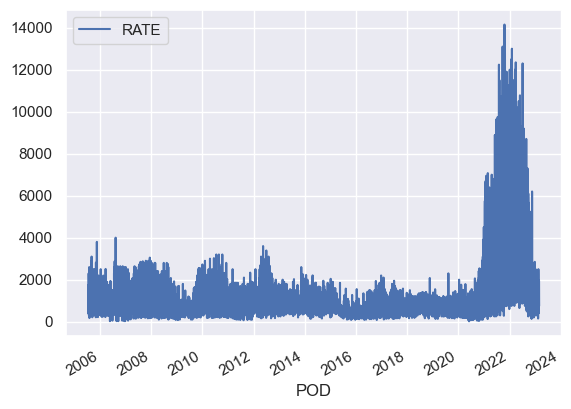

In [83]:
df4.plot(x='POD', y='RATE')
plt.show()

<h3>Encoding</h3>